# Working Toward a Daily Updated Thalweg Salinity Contours Video

In [47]:
from importlib import reload

import matplotlib.pyplot as plt
import netCDF4 as nc
import numpy as np

from salishsea_tools import nc_tools
from salishsea_tools.nowcast import figures

%matplotlib inline

In [2]:
title_font = {
    'fontname': 'Bitstream Vera Sans', 'size': '15', 'color': 'black',
    'weight': 'medium'
}
axis_font = {'fontname': 'Bitstream Vera Sans', 'size': '13'}

In [5]:
grid_T_d = nc.Dataset('../../SalishSea/nowcast/24oct15/SalishSea_1d_20151024_20151024_grid_T.nc')

In [89]:
colours = {
    'figure': {
        'facecolor': '#2B3E50',  # salishsea site Superhero theme background
    },
    'cbar': {
        'label': 'white',
        'tick labels': 'white',
    },
}

In [94]:
# %load -n figures.thalweg_salinity
def thalweg_salinity(
    grid_T_d,
    thalweg_pts_file='../../../bathymetry/thalweg_working.txt',
    salinity_levels = [26, 27, 28, 29, 30, 30.2, 30.4, 30.6, 30.8, 31, 32, 33, 34],
    cmap='hsv',
    colours=colours,
    figsize=(20, 8),
):
    thalweg_pts = np.loadtxt(thalweg_pts_file, delimiter=' ', dtype=int)
    x, z = np.meshgrid(
        np.arange(thalweg_pts.shape[0]), -grid_T_d.variables['deptht'][:])
    salinity = grid_T_d.variables['vosaline']
    masked_salinity = np.ma.masked_values(
        salinity[:][0, :, thalweg_pts[:, 0], thalweg_pts[:, 1]], 0)
    fig, ax = plt.subplots(1, 1, figsize=figsize)
    fig.set_facecolor(colours['figure']['facecolor'])
    mesh = ax.contourf(
        x, z, masked_salinity.transpose(), salinity_levels, cmap=cmap, extend='both')
    cbar = fig.colorbar(mesh, ax=ax)
    cbar.set_ticks(salinity_levels)
    cbar.set_label(
        'Practical Salinity [psu]', color=colours['cbar']['label'], **axis_font)
    cbar.ax.axes.tick_params(labelcolor=colours['cbar']['tick labels'])

    timestamp = nc_tools.timestamp(grid_T_d, 0)
    ax.set_title(
        'Salinity field along thalweg: ' +
        timestamp.format('DD-MMM-YYYY'),
        **title_font)
    ax.set_ylabel('Depth [m]', **axis_font)
    ax.set_xlabel('Position along Thalweg', **axis_font)
#    axis_colors(ax, 'white')
    figures.axis_colors(ax, 'white')
    ax.set_axis_bgcolor('burlywood')
    ########################
    #add_bathy(x, thalweg_pts, ax)
    ########################
    return fig, cbar

/home/doug/warehouse/conda_envs/analysis/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


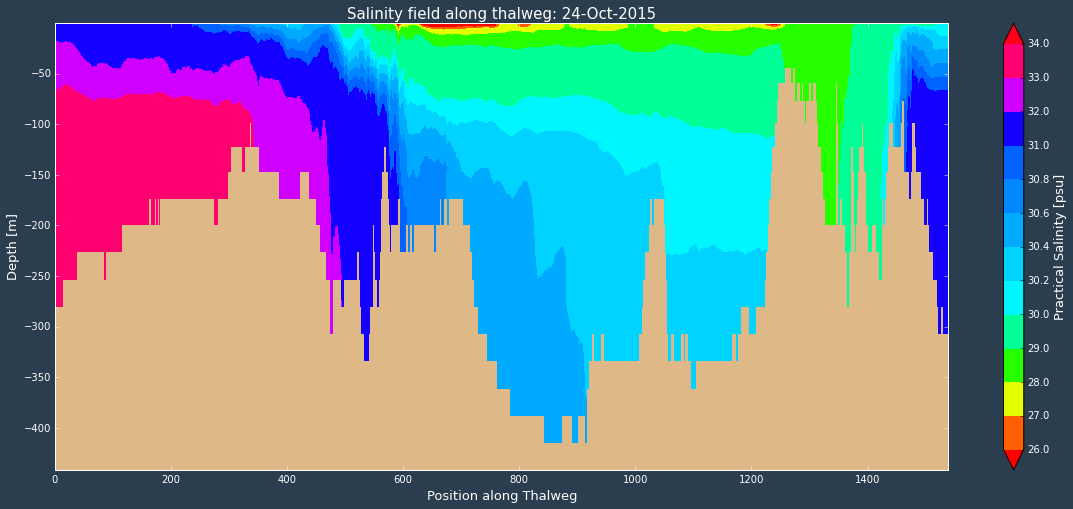

In [95]:
fig, cbar = thalweg_salinity(grid_T_d, thalweg_pts_file='../../tools/bathymetry/thalweg_working.txt', colours=colours)

In [88]:
cbar.ax.axes.tick_params()

In [29]:
pts = np.loadtxt('../../tools/bathymetry/thalweg_working.txt', delimiter=' ', dtype=int)
print(pts.shape, pts.size)

(1539, 2) 3078


In [40]:
salinity = grid_T_d.variables['vosaline']

In [57]:
import matplotlib

In [42]:
matplotlib.figure.Figure.set_facecolor()

In [46]:
matplotlib.axes.Axes.contourf()

(40, 1539)

/home/doug/warehouse/conda_envs/analysis/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


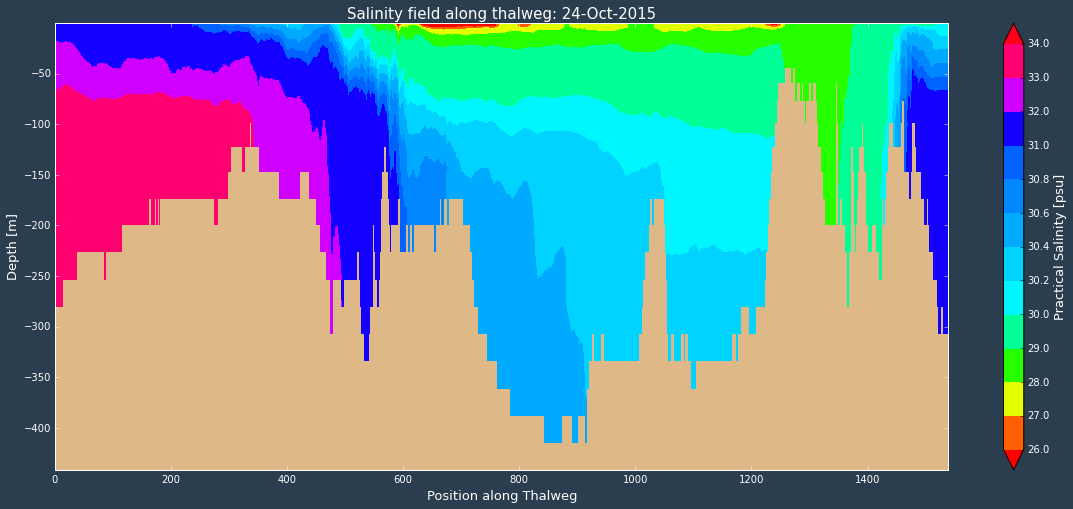

In [96]:
reload(figures)

fig = figures.thalweg_salinity(grid_T_d, thalweg_pts_file='../../tools/bathymetry/thalweg_working.txt')

In [ ]:
figures.thalweg_salinity()